# ABBREVIATION OF THE FEATURES IN THE DATASET

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

Gender, Age, Height and Weight.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('max_columns', 100)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.arff
/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [3]:
file_path = '/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv'

In [4]:
data = pd.read_csv(file_path)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Preprocessing and EDA

In [5]:
data = data.rename(columns={'family_history_with_overweight': 'FHWO',
                           'NObeyesdad' : 'BMI',})

In [6]:
data.shape

(2111, 17)

In [7]:
data.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2111 non-null   object 
 1   Age     2111 non-null   float64
 2   Height  2111 non-null   float64
 3   Weight  2111 non-null   float64
 4   FHWO    2111 non-null   object 
 5   FAVC    2111 non-null   object 
 6   FCVC    2111 non-null   float64
 7   NCP     2111 non-null   float64
 8   CAEC    2111 non-null   object 
 9   SMOKE   2111 non-null   object 
 10  CH2O    2111 non-null   float64
 11  SCC     2111 non-null   object 
 12  FAF     2111 non-null   float64
 13  TUE     2111 non-null   float64
 14  CALC    2111 non-null   object 
 15  MTRANS  2111 non-null   object 
 16  BMI     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [9]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
# Total columns
col = data.columns
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [11]:
# Identify the data types of each column
column_types = data.dtypes

# Filter out the columns with categorical features
categorical_columns = column_types[column_types == 'object'].index.tolist()

# Print the columns with categorical features
print("Columns with categorical features:")
for column in categorical_columns:
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("------------------------------------")

Columns with categorical features:
Column: Gender
Unique values: ['Female' 'Male']
------------------------------------
Column: FHWO
Unique values: ['yes' 'no']
------------------------------------
Column: FAVC
Unique values: ['no' 'yes']
------------------------------------
Column: CAEC
Unique values: ['Sometimes' 'Frequently' 'Always' 'no']
------------------------------------
Column: SMOKE
Unique values: ['no' 'yes']
------------------------------------
Column: SCC
Unique values: ['no' 'yes']
------------------------------------
Column: CALC
Unique values: ['no' 'Sometimes' 'Frequently' 'Always']
------------------------------------
Column: MTRANS
Unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
------------------------------------
Column: BMI
Unique values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
------------------------------------


FROM THE ABOVE SET OF CATEGORICAL FEATURES WE MAY CONSIDER 'BMI' AS AN ORDINAL FEATURE AS THERE IS A GRADUAL SENSE OF ICREASE IN OBESITY AMONG ITS UNIQUE VALUES.IT WILL ALSO BE OUR OUTPUT FEATURE.


'CAEC','CALC' AND 'MTRANS' CAN ALSO BE CONSIDERED AS ORDINAL FEATURES FOR THE NATURAL ORDER OF RANKING IN CATEGORIES PRESENT IN THEM.

REST OF THE CATEGORICAL FEATURES CAN BE CONSIDERED AS NOMINAL FEATURES

# Unique Value Atribute

In [12]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]

good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
good_label_cols.remove('BMI')

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender', 'FHWO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [13]:
printf = 'Value Unique {}:\n {} \n'

for count, i in enumerate(object_cols):
    val_count = data['{}'.format(i)].value_counts()
    print(count, printf.format(i, val_count))

0 Value Unique Gender:
 Male      1068
Female    1043
Name: Gender, dtype: int64 

1 Value Unique FHWO:
 yes    1726
no      385
Name: FHWO, dtype: int64 

2 Value Unique FAVC:
 yes    1866
no      245
Name: FAVC, dtype: int64 

3 Value Unique CAEC:
 Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

4 Value Unique SMOKE:
 no     2067
yes      44
Name: SMOKE, dtype: int64 

5 Value Unique SCC:
 no     2015
yes      96
Name: SCC, dtype: int64 

6 Value Unique CALC:
 Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

7 Value Unique MTRANS:
 Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

8 Value Unique BMI:
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight   

In [14]:
#CHECK NULL VALUES
data.isnull().sum()

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
BMI       0
dtype: int64

## Transformation

In [15]:
data_transform = data.copy()

In [16]:
# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Specify the columns you want to encode
ordinal_cols = ['CALC','MTRANS']

# Fit and transform the specified columns with OrdinalEncoder
data_transform[ordinal_cols] = encoder.fit_transform(data_transform[ordinal_cols])


WE NOTICED THAT ORDINAL ENCODER DIDN'T DO A GOOD JOB WITH THE FEATURE 'CAEC' THEREFORE WE WILL USE ORDINAL MAPPING

In [17]:
CAEC_map = {"no": 0,"Sometimes": 1, "Frequently": 2,"Always": 3 }
data_transform['CAEC'] = data_transform['CAEC'].map(CAEC_map)


WE WILL DO THE SAME WITH OUR OUTPUT FEATURE 'BMI'

In [18]:
ordinal_mapping_output = {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6,}

data_transform['BMI'] = data_transform['BMI'].map(ordinal_mapping_output)

USING LABEL ENCODING FOR THE NOMINAL FEATURES

In [19]:
label_encoder = LabelEncoder()
data_transform['Gender'] = label_encoder.fit_transform(data_transform['Gender'])
data_transform['FHWO'] = label_encoder.fit_transform(data_transform['FHWO'])
data_transform['SMOKE'] = label_encoder.fit_transform(data_transform['SMOKE'])
data_transform['SCC'] = label_encoder.fit_transform(data_transform['SCC'])
data_transform['FAVC'] = label_encoder.fit_transform(data_transform['FAVC'])


In [20]:
data_transform

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,3.0,3.0,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2.0,3.0,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,1.0,3.0,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,1.0,4.0,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,2.0,3.0,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,2.0,3.0,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,2.0,3.0,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,2.0,3.0,6


In [21]:
data_transform.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Data Visualization

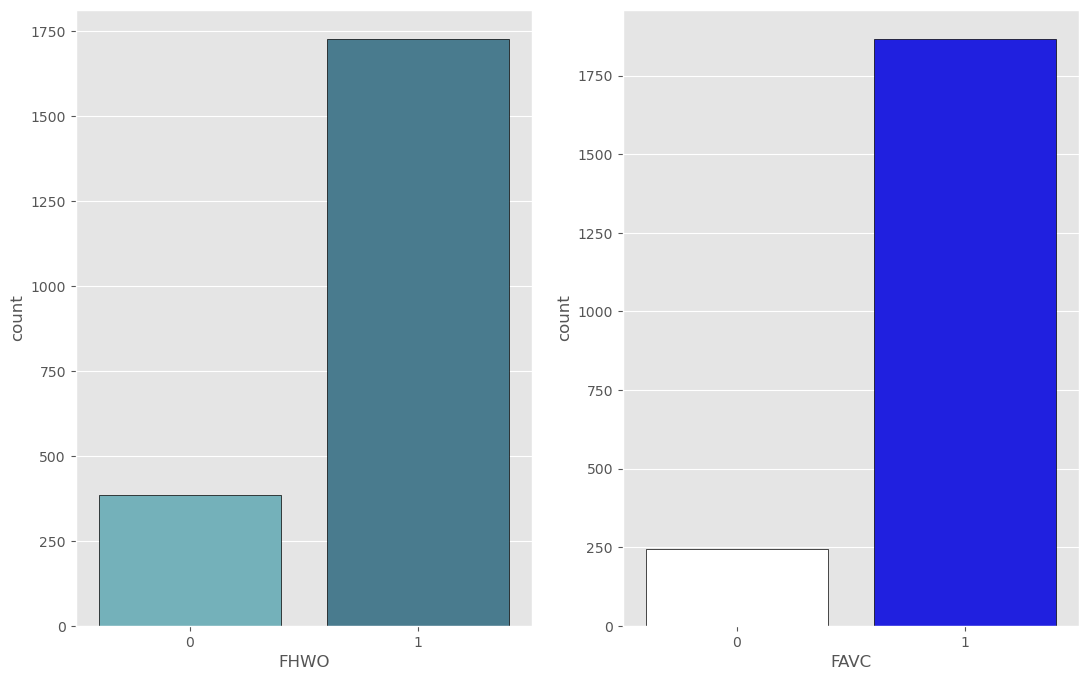

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'FHWO', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'FAVC', data = data_transform, palette="flag",edgecolor="black")
plt.savefig('count1.png', bbox_inches='tight',pad_inches=0)

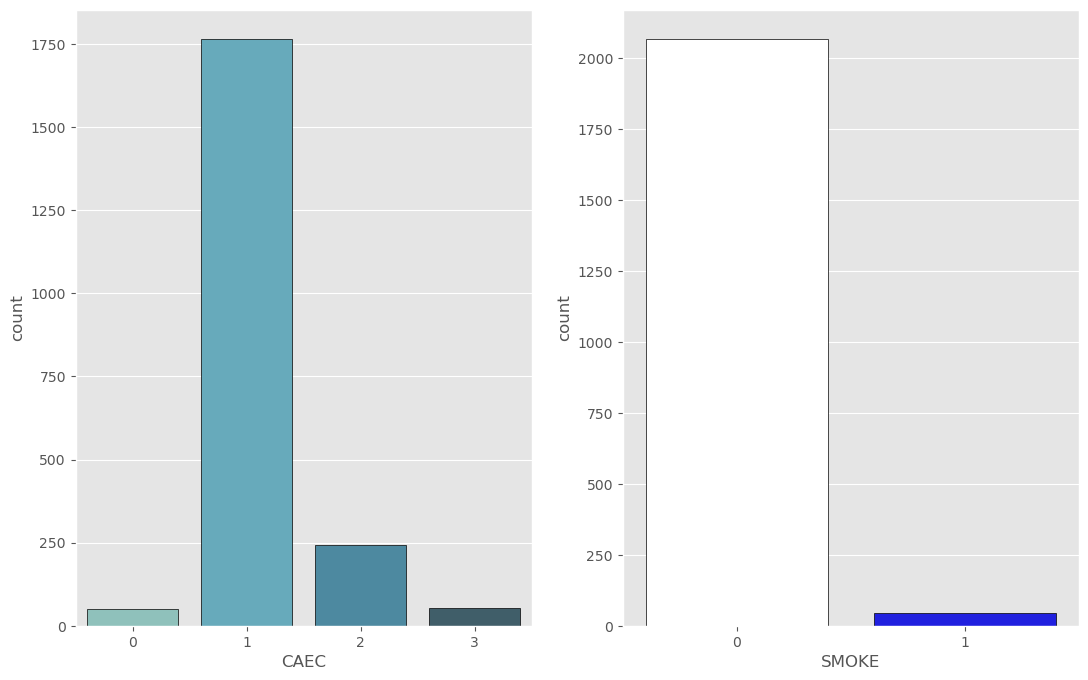

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.countplot(x= 'CAEC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'SMOKE', data = data_transform, palette="flag",edgecolor="black")
plt.savefig('count2.png', bbox_inches='tight',pad_inches=0)

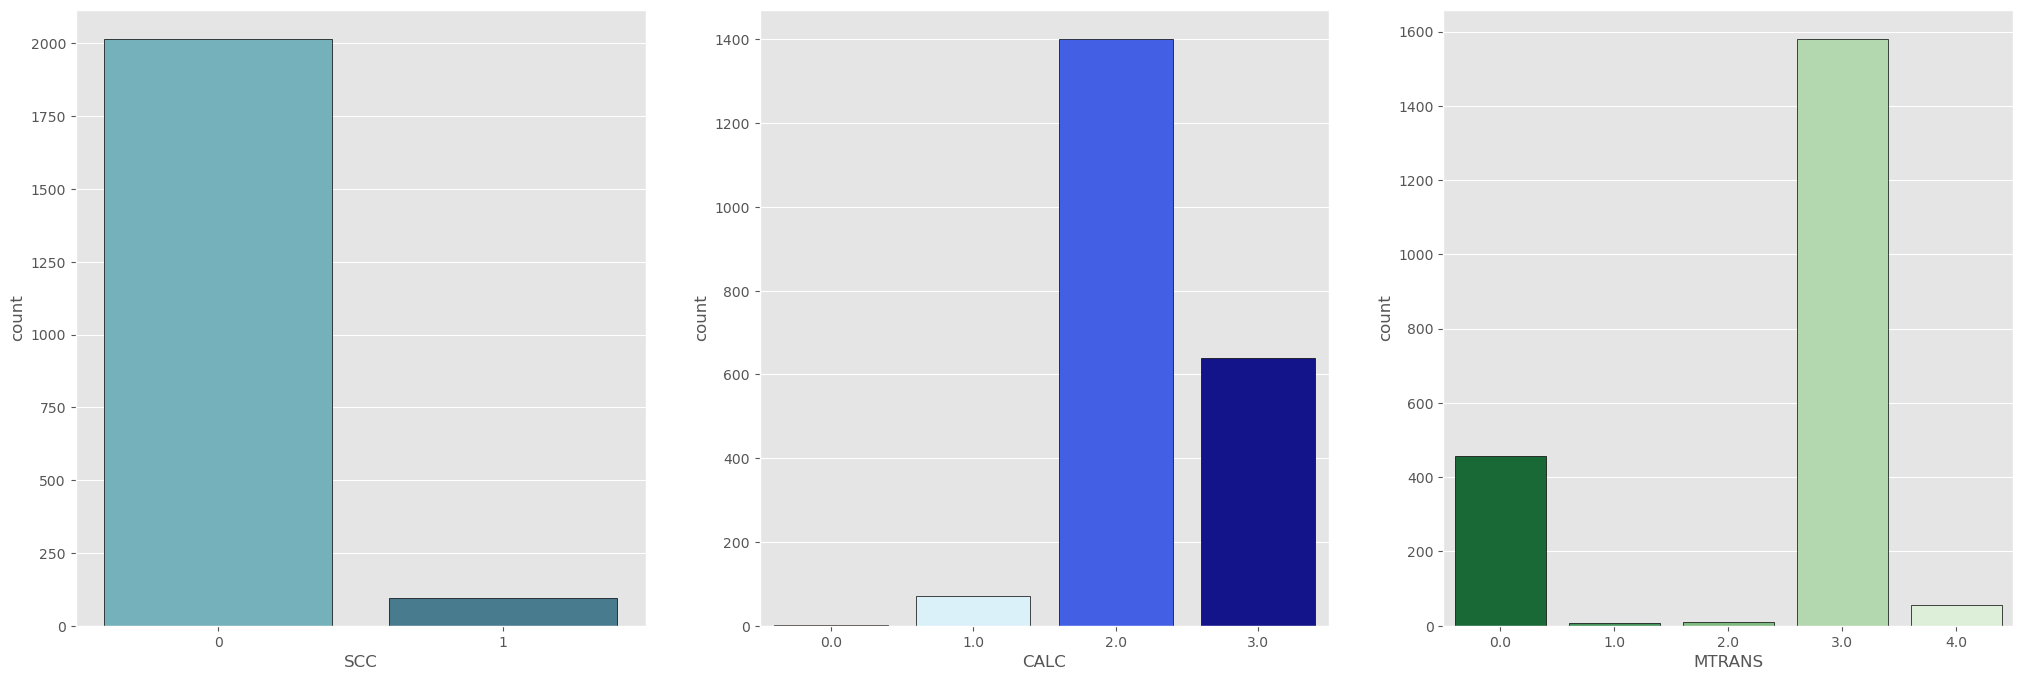

In [24]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.countplot(x= 'SCC', data = data_transform, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'CALC', data = data_transform, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'MTRANS', data = data_transform, palette="Greens_r",edgecolor="black")
plt.savefig('count3.png', bbox_inches='tight',pad_inches=0)

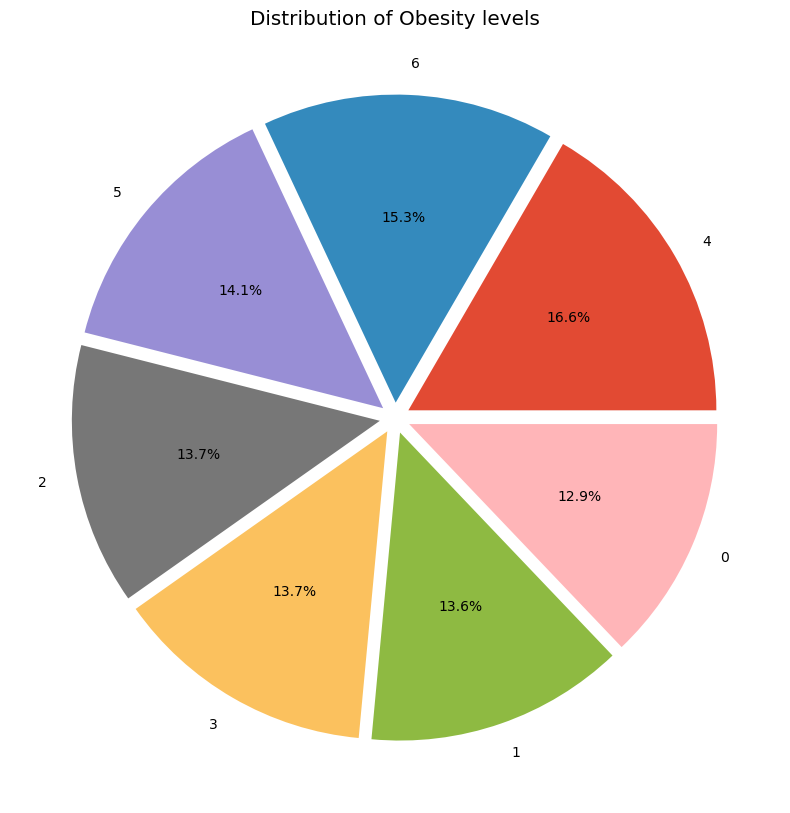

In [25]:
target_counts = data_transform['BMI'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
target_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05]*7, 
              figsize=(10,10))
plt.ylabel('')
plt.title('Distribution of Obesity levels')
plt.show()


## Label

- Insufficient_Weight   : 0
- Normal_Weight         : 1
- Overweight_Level_I    : 2
- Overweight_Level_II   : 3
- Obesity_Type_I        : 4
- Obesity_Type_II       : 5
- Obesity_Type_III      : 6

In [26]:
corr = data_transform.corr()

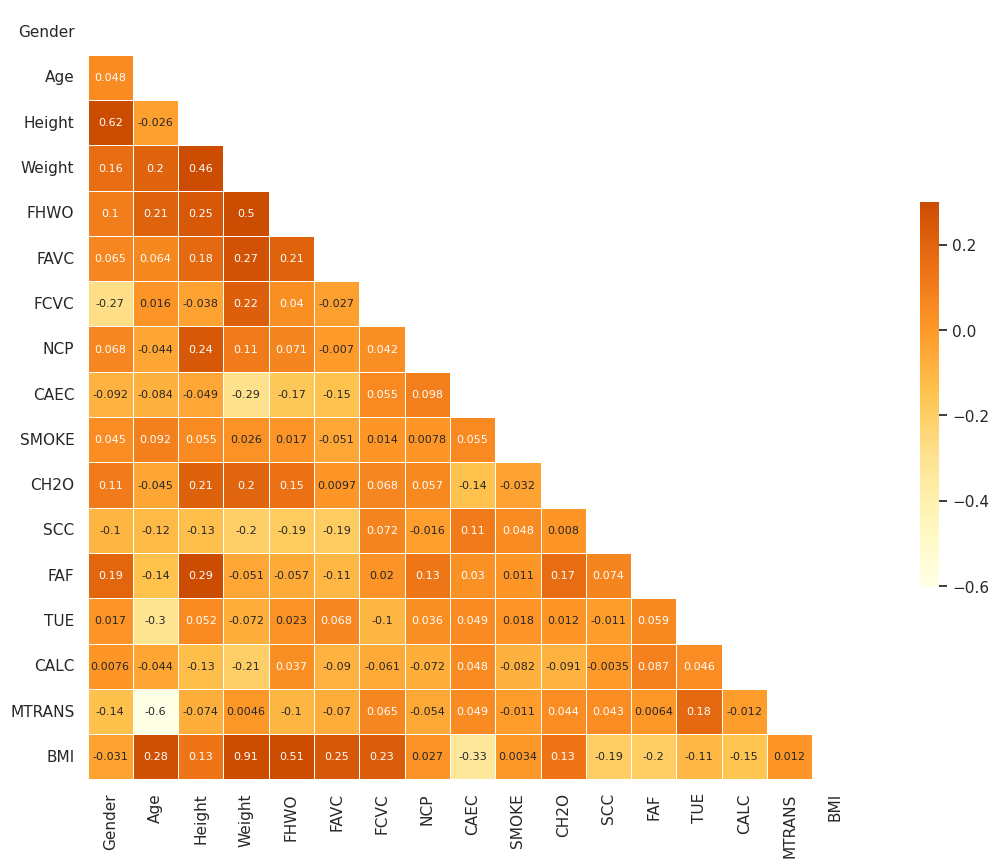

In [27]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot = True, annot_kws={"size": 8})
plt.savefig('correlation.png', bbox_inches='tight',pad_inches=0)

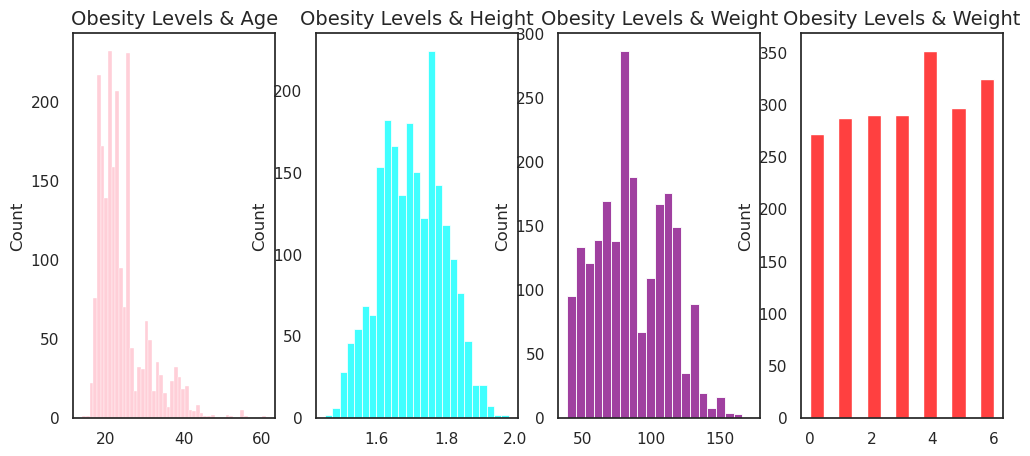

In [28]:
# Distribution of different types
fig , ax = plt.subplots(1,4,figsize = (12,5))

Age = data_transform.Age.values
Height= data_transform.Height.values
Weight = data_transform.Weight.values
BMI = data_transform.BMI.values

sns.histplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.histplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.histplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)
sns.histplot(BMI , ax = ax[3] , color = 'red').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

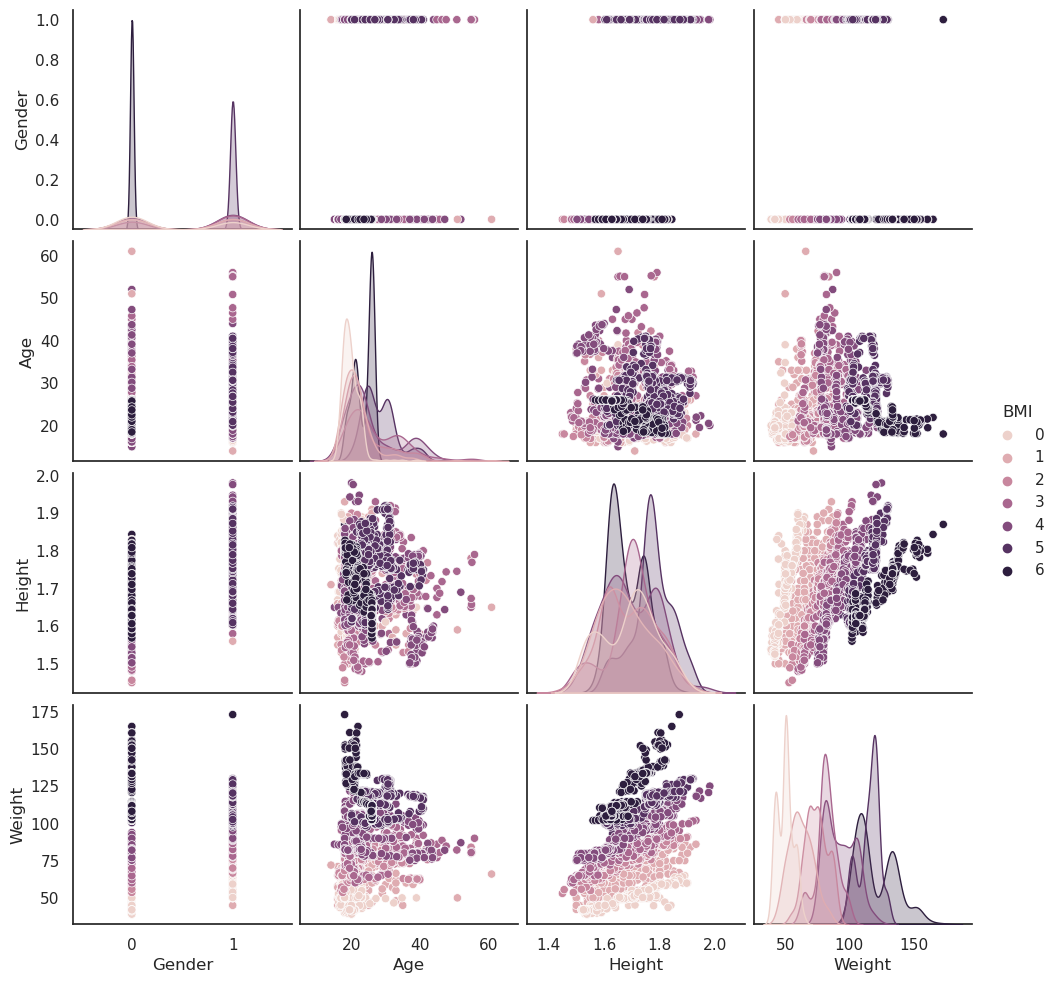

In [29]:
sns.pairplot(data_transform, 
             hue ='BMI', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
plt.savefig('pairplot1.png')

# Preparing Data Train and Test

In [30]:
data_input = data_transform.copy()

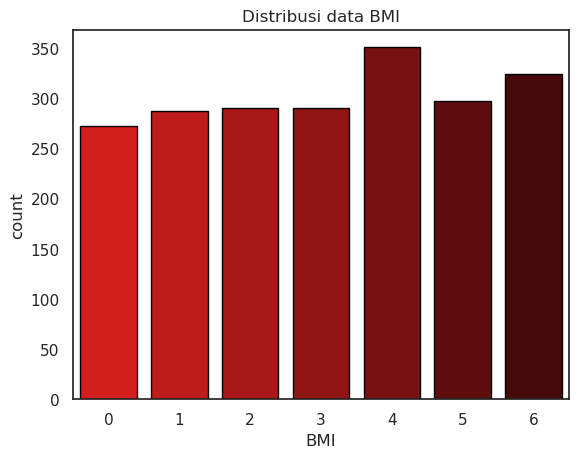

In [31]:
ax = sns.countplot(x = "BMI",data=data_input, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
plt.savefig('Distribusi_hist.png')

In [32]:
data_grouped_by = data_input.groupby(['BMI'])
data_balanced = data_grouped_by.apply(lambda x: x.sample(data_grouped_by.size().min()).reset_index(drop=True))
data_bal = data_balanced.droplevel(['BMI'])
data_bal

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,19.483036,1.537770,42.000000,0,1,3.000000,1.000000,2,0,1.387531,0,0.000000,0.466169,2.0,3.0,0
1,0,22.000000,1.670000,50.000000,1,0,3.000000,3.000000,0,0,3.000000,1,2.000000,1.000000,2.0,3.0,0
2,1,18.000000,1.767058,51.132809,1,1,2.708965,3.000000,1,0,1.873004,0,1.217180,1.000000,2.0,3.0,0
3,1,19.729250,1.793315,58.195150,1,1,2.508835,3.435905,1,0,2.076933,0,2.026668,1.443328,3.0,0.0,0
4,1,17.080493,1.782756,56.029418,1,1,2.000000,4.000000,1,0,2.285250,0,2.000000,1.162801,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0,24.291205,1.711460,113.372851,1,1,3.000000,3.000000,1,0,2.796894,0,0.382189,0.167790,2.0,3.0,6
268,0,25.612462,1.674515,112.879662,1,1,3.000000,3.000000,1,0,2.989389,0,0.360090,0.169016,2.0,3.0,6
269,0,26.000000,1.627567,107.482662,1,1,3.000000,3.000000,1,0,2.687378,0,0.000000,0.410651,2.0,3.0,6
270,0,26.000000,1.624576,110.803117,1,1,3.000000,3.000000,1,0,2.704827,0,0.000000,0.269577,2.0,3.0,6


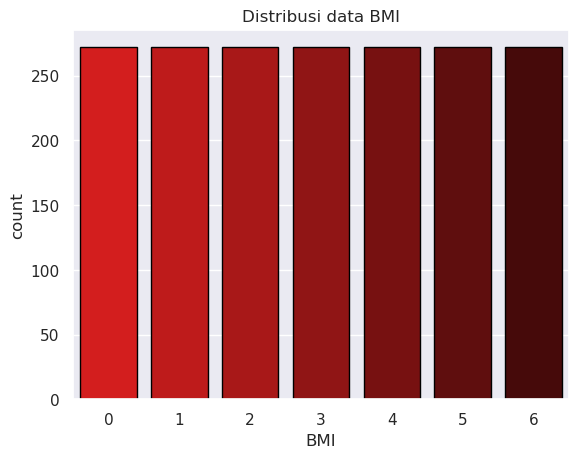

In [33]:
ax = sns.countplot(x = "BMI",data=data_bal, palette="flag",edgecolor="black")
plt.title('Distribusi data BMI')
sns.set(font_scale=1)
plt.savefig('Distribusi_hist.png')

In [34]:
X = data_bal.iloc[:,data_bal.columns != 'BMI']
y = np.ravel(data_bal.iloc[:,data_bal.columns == 'BMI'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                      random_state=10)
print(X_train.shape)

(1523, 16)


# Machine Learning Models

For this exercise we will take a look at 
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- K Nearest Neighbors 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")      

In [37]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.95801
Accuracy w/Scaled Data (ss): 0.95801
Accuracy w/Scaled Data (mm): 0.95801

Classification Report (mm):
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.86      0.98      0.92        52
           2       0.93      0.87      0.90        46
           3       0.93      0.93      0.93        55
           4       0.98      0.98      0.98        46
           5       1.00      0.98      0.99        54
           6       1.00      1.00      1.00        69

    accuracy                           0.96       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.96      0.96      0.96       381

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.94488
Accuracy w/Scaled Data (s

# Hyperparameter Tuning¶
Searching for better performance out of the models with Gridsearch

In [38]:
from sklearn.model_selection import GridSearchCV

#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))

In [39]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

KNN

In [40]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.94
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.90      0.73      0.81        52
           2       0.82      0.98      0.89        46
           3       0.95      0.95      0.95        55
           4       0.96      1.00      0.98        46
           5       1.00      0.98      0.99        54
           6       1.00      1.00      1.00        69

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.95      0.94      0.94       381



WE ARE ABLE TO INCREASE ACCURACY OF KNN MODEL SIGNIFICANTLY

Random Forest

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score = 0.96
{'criterion': 'entropy', 'max_depth': 90, 'n_estimators': 170}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        59
           1       0.88      0.96      0.92        52
           2       0.93      0.91      0.92        46
           3       0.93      0.93      0.93        55
           4       0.98      0.98      0.98        46
           5       1.00      0.98      0.99        54
           6       1.00      1.00      1.00        69

    accuracy                           0.96       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.96      0.96      0.96       381



FEATURE IMPORTANCE

In [42]:
# Create Random Forest classifer object with optimized parameters
clf = RandomForestClassifier(criterion='entropy',
               n_estimators=190,
              max_depth = 60,              
              max_features='auto',)

# Train Random Forest Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)


In [43]:
print(X.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


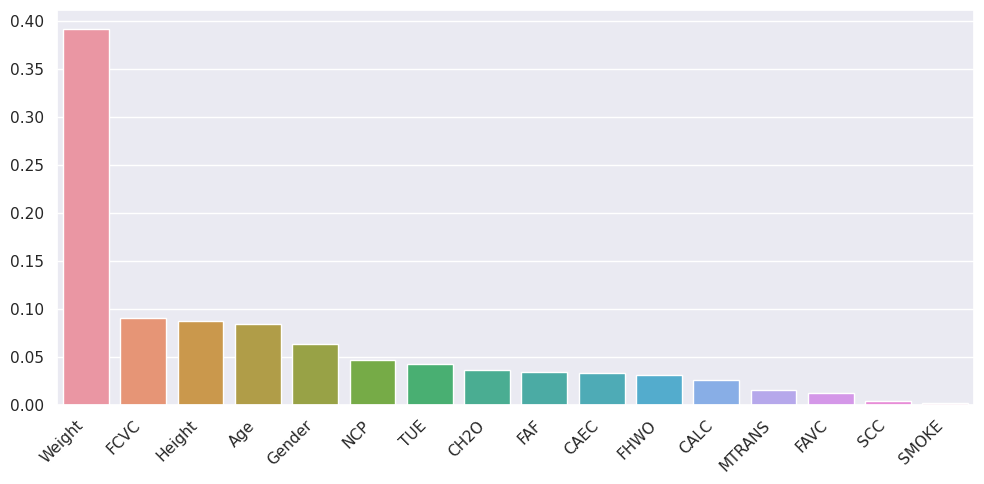


Top 10 Features:
Variable: Weight               Importance: 0.39
Variable: Height               Importance: 0.09
Variable: FCVC                 Importance: 0.09
Variable: Age                  Importance: 0.08
Variable: Gender               Importance: 0.06
Variable: NCP                  Importance: 0.05
Variable: CH2O                 Importance: 0.04
Variable: TUE                  Importance: 0.04
Variable: FHWO                 Importance: 0.03
Variable: CAEC                 Importance: 0.03

Bottom 10 Features:
Variable: SMOKE                Importance: 0.0
Variable: SCC                  Importance: 0.0
Variable: FAVC                 Importance: 0.01
Variable: MTRANS               Importance: 0.02
Variable: FHWO                 Importance: 0.03
Variable: CAEC                 Importance: 0.03
Variable: FAF                  Importance: 0.03
Variable: CALC                 Importance: 0.03
Variable: CH2O                 Importance: 0.04
Variable: TUE                  Importance: 0.04


In [44]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]